# Abalone Age Predictor

## Jose Luis Estrada, Nava Roohi, Ashutosh Singh

Traditionally, the process to predict the age of the abalone is by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. The abalone dataset includes numeric attributes with different type of measurements with the goal to predict the age of an abalone more efficently.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
abalone = pd.read_csv("abalone.csv")
abalone["Age"] = abalone["Rings"] + 1.5
abalone.drop("Rings", axis = 1, inplace = True)

The table has 4,177 observations and 9 columns. The attribute Rings was replaced by the variable Age since each rings is equivalent to the number of rings plus 1.5 (Hossain). This will be helpful at a later stage of the project when the dataset is split into training and test set. As a reminder, the goal of this project is to calculate the age of the abalone, so the dependent variable will be Age.

In [8]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Furthermore, the attributes in the abalone dataset are numeric in its majority, and Sex is the only categorical data (binary). The dataset is not missing any values, so no data cleaning is needed.

In [13]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [11]:
abalone.isna().mean().to_frame(name='% of missing values')

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
Age,0.0


The correlation plot shows high correlations (between 0.75 and 0.99) within the independent variables, but a medium direct correlation with the target value (between 0.4 and .65)

<AxesSubplot:>

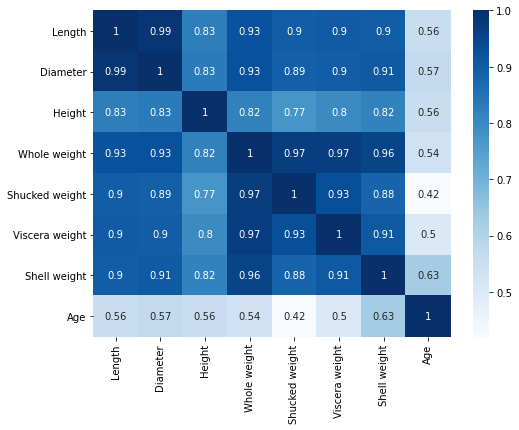

In [17]:
plt.figure(figsize = (8,6))
corr = abalone.corr()
sns.heatmap(corr, annot = True, cmap = "Blues")